First we have to install Manim and the dependencies (This takes 1-2 minutes)

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Once it is done it will ask you to restart the runtime, do that and then continue

Now we can load in the manim package and other useful packages

In [2]:
from manim import * 
import numpy as np
from typing import Tuple, Callable, List
import matplotlib.pyplot as plt

Manim Community v0.15.2

# Intro Example: Creating a Vector on a coordinate system

In [ ]:
#@title
%%manim -qm -v WARNING VectorArrow 
# The line above tells the system to actually create the animation
class VectorArrow(Scene):
    def construct(self):
        # This line creates a dot that is positioned at the (0, 0) coordinate.
        dot = Dot(ORIGIN)
        # This line creates an arrow that goes from ORIGIN (0,0) to (2,2)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)
        # This line creates a coordinate system
        numberplane = NumberPlane()
        # We are adding a description next to the dot
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        # We add a description next to the tip of the arrow
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        # Add all created elements to the scene
        self.add(numberplane, dot, arrow, origin_text, tip_text)

In [ ]:
#@title
%%manim -qm -v WARNING DecimalMatrixExample
class DecimalMatrixExample(Scene):
    def construct(self):
        m0 = DecimalMatrix(
            [[3.456, 2.122], [33.2244, 12]],
            element_to_mobject_config={"num_decimal_places": 2},
            left_bracket="\{",
            right_bracket="\}")
        self.add(m0)

In [ ]:
#@title
%%manim -qm ApplyMatrixExample
class ApplyMatrixExample(Scene):
    def construct(self):
        dot = Dot(ORIGIN)
        numberplane = NumberPlane()

        unit_vec_x = Arrow(ORIGIN, [1, 0, 0], buff=0)
        unit_vec_y = Arrow(ORIGIN, [0, 1, 0], buff=0)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)

        matrix =  
        

        unit_vec_x.set_color(RED)
        unit_vec_y.set_color(GREEN)
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        m0 = DecimalMatrix(
            matrix,
            element_to_mobject_config={"num_decimal_places": 2},
            left_bracket="\{",
            right_bracket="\}")
        m0.move_to(LEFT*5+UP*2)
        self.add(numberplane, dot, arrow, unit_vec_x, unit_vec_y, origin_text, tip_text, m0)
        self.wait(5)
        self.remove(tip_text)
        self.play(
            ApplyMatrix(matrix, numberplane), 
            ApplyMatrix(matrix, arrow),
            ApplyMatrix(matrix, unit_vec_x),
            ApplyMatrix(matrix, unit_vec_y)
        )
        tip_text = Text('(-2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(tip_text)
        self.wait(5)

In [ ]:
#@title 
%%manim -qm ApplyMatrixExample
class ApplyMatrixExample(Scene):
    def construct(self):
        dot = Dot(ORIGIN)
        numberplane = NumberPlane()

        unit_vec_x = Arrow(ORIGIN, [1, 0, 0], buff=0)
        unit_vec_y = Arrow(ORIGIN, [0, 1, 0], buff=0)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)

        matrix = [[-1, 0], 
                [0, 1]]
        

        unit_vec_x.set_color(RED)
        unit_vec_y.set_color(GREEN)
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        m0 = DecimalMatrix(
            matrix,
            element_to_mobject_config={"num_decimal_places": 2},
            left_bracket="\{",
            right_bracket="\}")
        m0.move_to(LEFT*5+UP*2)
        self.add(numberplane, dot, arrow, unit_vec_x, unit_vec_y, origin_text, tip_text, m0)
        self.wait(5)
        self.remove(tip_text)
        self.play(
            ApplyMatrix(matrix, numberplane), 
            ApplyMatrix(matrix, arrow),
            ApplyMatrix(matrix, unit_vec_x),
            ApplyMatrix(matrix, unit_vec_y)
        )
        tip_text = Text('(-2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(tip_text)
        self.wait(5)

In [3]:
State = np.ndarray
Derivative = Callable[[State], State]

In [4]:
def lotka_volterra(alpha:float, beta:float, delta:float, gamma:float) -> Tuple[Derivative, Derivative]:
  def x_dot(state):
    x, y = state
    return (alpha * x) - (beta * x * y)
  
  def y_dot(state):
    x, y = state
    return (delta * x * y) - (gamma * y)

  def state_derivative(state):
    return np.array([x_dot(state), y_dot(state)])

  return x_dot, y_dot, state_derivative


In [5]:
def forward_euler(state:State, h:float, derivatives:Tuple[Derivative, Derivative]) -> State:
  newState = np.copy(state)
  for idx, derivative in enumerate(derivatives):
    newState[idx] = state[idx] + h * derivative(newState)
  return newState

In [6]:
alpha, beta, delta, gamma, h = 1.1, 0.4, 0.1, 0.4, 0.001

x_dot, y_dot, state_derivative = lotka_volterra(alpha, beta, delta, gamma)
derivatives = [x_dot, y_dot]

num_prey = [10.]
num_predators = [10.]
time = 0
timesteps = [time]

state = np.array([num_prey[0], num_predators[0]])

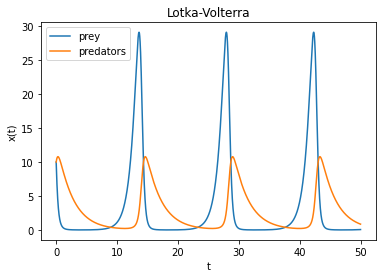

In [7]:
while time < 50:
  state = forward_euler(state, h, derivatives)
  num_prey.append(state[0])
  num_predators.append(state[1])
  time = time + h
  timesteps.append(time)

plt.plot(timesteps, num_prey, label="prey")
plt.plot(timesteps, num_predators, label="predators")
plt.title("Lotka-Volterra")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(loc="upper left")

In [91]:
%%manim -qm -v WARNING BasicUsage 
class BasicUsage(MovingCameraScene):
    def construct(self):
        func = lambda pos: np.pad(state_derivative(pos[:2]), (0,1))
        streamlines = StreamLines(func)
        self.add(streamlines)
        streamlines.start_animation(warm_up=False, flow_speed=1.5)

        #self.play(self.camera.frame.animate.set(width=10, height=5))
        self.play(self.camera.frame.animate.move_to(ORIGIN + [5, 2.5, 0]).set(width=10, height=5))
        self.wait(5)
        

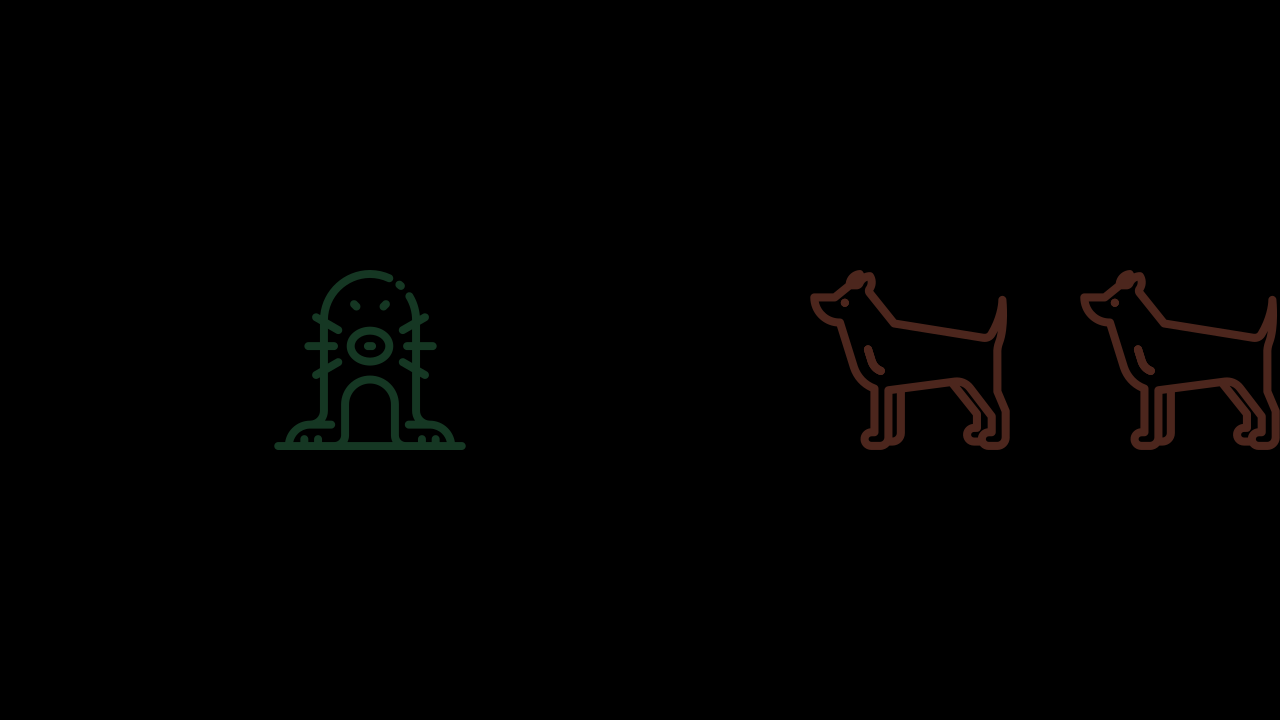

In [11]:
# @title SVGMobject test
%%manim -qm -v WARNING SVGBase 
class SVGBase(MovingCameraScene):
    def construct(self):
        dog = SVGMobject("dog.svg")
        dog.move_to(ORIGIN + [3,0,0])

        copy = dog.copy()
        copy.move_to(ORIGIN + [6,0,0])

        mole = SVGMobject("mole.svg")
        mole.move_to(ORIGIN - [3,0,0])

        self.add(dog, mole, copy)
        

In [10]:
%%manim -qm -v WARNING LotkaVolterra 
class LotkaVolterra(MovingCameraScene):
    def construct(self):
        cur_prey_size = 0
        cur_predator_size = 0

        dog_mobject = SVGMobject("dog.svg")
        mole_mobject = SVGMobject("mole.svg")

        for idx, step in enumerate(timesteps):
            new_prey_size = int(num_prey[idx])
            new_predator_size = int(num_predators[idx])

            # Fade out the "dead" prey
            if cur_prey_size > new_prey_size:
              pass
            # Fade in the new prey
            elif cur_prey_size < new_prey_size:
              pass
            # Fade out the "dead" predators
            if cur_predator_size > new_predator_size:
              pass
            # Fade in the new predators
            elif cur_predator_size < new_predator_size:
              pass

        self.play(FadeIn(dog))

        self.wait(3)

        self.play(FadeOut(dog))